In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy

/home/prajwol/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
!ls

'1.Data Pre-Processing.ipynb'		       dataset.csv
 2.ClassificationUsingCosineSimilarity.ipynb   featurextacted.csv
 3.Feature-Extractions.ipynb		       non_clickbait_data
 4.LogisticRegressionClassification.ipynb      NonClickbaits.csv
 clickbait_data				       README.md
 Clickbaits.csv				       Visualization.ipynb


In [6]:
clkbait = pd.read_csv("Clickbaits.csv")
nonclkbait = pd.read_csv("NonClickbaits.csv")

In [7]:
lenclick = len(clkbait)
lennonclick = len(nonclkbait)

In [25]:
nlp = spacy.load('en_core_web_sm')

In [37]:
def clickPOS():
    ccntPOS = []
    vrb,pron,aux,noun,det,propn,adp,punct,adv,adj,part,cconj,intj,x,num,sym,sconj,space = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    for i in range(lenclick):
        doc = nlp(clkbait["Clickbaits"][i])
        for token in doc:
            if token.pos_ == "VERB":
                vrb += 1
            elif token.pos_ == "PRON":
                pron += 1
            elif token.pos_ == "AUX":
                aux += 1
            elif token.pos_ == "NOUN":
                noun += 1
            elif token.pos_ == "DET":
                det += 1
            elif token.pos_ == "PROPN":
                propn += 1
            elif token.pos_ == "ADP":
                adp += 1
            elif token.pos_ == "PUNCT":
                punct += 1
            elif token.pos_ == "ADJ":
                adj += 1
            elif token.pos_ == "ADV":
                adv += 1
            elif token.pos_ == "PART":
                part += 1
            elif token.pos_ == "CCONJ":
                cconj += 1
            elif token.pos_ == "INTJ":
                intj += 1
            elif token.pos_ == "X":
                x += 1
            elif token.pos_ == "NUM":
                num += 1
            elif token.pos_ == "SYM":
                sym += 1
            elif token.pos_ == "SCONJ":
                sconj += 1
            elif token.pos_ == "SPACE":
                space += 1
            ccntPOS.append(token.pos_)
    clickPOS_CNT = [propn,part,noun,adv,cconj,pron,intj,adj,x,aux,num,adp,sym,vrb,det,punct,sconj,space]
    return (set(ccntPOS),clickPOS_CNT)

In [48]:
def nonclickPOS():
    nccntPOS = []
    vrb,pron,aux,noun,det,propn,adp,punct,adv,adj,part,cconj,intj,x,num,sym,sconj,space = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
    for i in range(lennonclick):
        doc = nlp(nonclkbait["Clickbaits"][i])
        for token in doc:
            if token.pos_ == "VERB":
                vrb += 1
            elif token.pos_ == "PRON":
                pron += 1
            elif token.pos_ == "AUX":
                aux += 1
            elif token.pos_ == "NOUN":
                noun += 1
            elif token.pos_ == "DET":
                det += 1
            elif token.pos_ == "PROPN":
                propn += 1
            elif token.pos_ == "ADP":
                adp += 1
            elif token.pos_ == "PUNCT":
                punct += 1
            elif token.pos_ == "ADJ":
                adj += 1
            elif token.pos_ == "ADV":
                adv += 1
            elif token.pos_ == "PART":
                part += 1
            elif token.pos_ == "CCONJ":
                cconj += 1
            elif token.pos_ == "INTJ":
                intj += 1
            elif token.pos_ == "X":
                x += 1
            elif token.pos_ == "NUM":
                num += 1
            elif token.pos_ == "SYM":
                sym += 1
            elif token.pos_ == "SCONJ":
                sconj += 1
            elif token.pos_ == "SPACE":
                space += 1
            nccntPOS.append(token.pos_)
    nonclickPOS_CNT = [propn,part,noun,adv,cconj,pron,intj,adj,x,aux,num,adp,sym,vrb,det,punct,sconj,space]
    return (nonclickPOS_CNT)

In [49]:
labels,clickPOS_CNT = clickPOS()
nonclickPOS_CNT = nonclickPOS()
labels = list(labels)

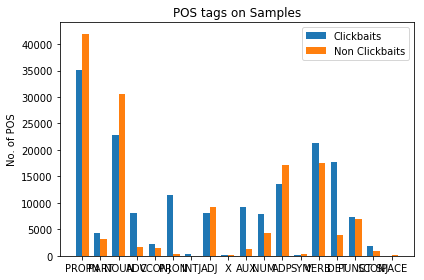

In [50]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, clickPOS_CNT, width, label='Clickbaits')
rects2 = ax.bar(x + width/2, nonclickPOS_CNT, width, label='Non Clickbaits')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No. of POS')
ax.set_title('POS tags on Samples')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()